Loading and Visualizing Data ...

Mounted at /content/drive


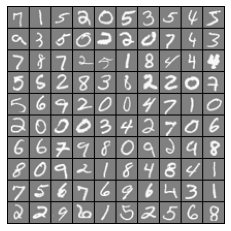

Program paused. Press enter to continue.


Testing lrCostFunction() with regularization

Cost: 2.534819396109744
Expected cost: 2.534819

Gradients:
[ 0.14656137 -0.54855841  0.72472227  1.39800296]

Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003

Program paused. Press enter to continue.


Training One-vs-All Logistic Regression...

Program paused. Press enter to continue.

Training Set Accuracy:  95.06


In [15]:
## Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the
#  linear exercise. You will need to complete the following functions
#  in this exericse:
#
#     lrCostFunction.m (logistic regression cost function)
#     oneVsAll.m
#     predictOneVsAll.m
#     predict.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

## Initialization
#clear ; close all; clc

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math
from scipy import optimize
from scipy.io import loadmat




def sigmoid(z):
#SIGMOID Compute sigmoid functoon
#   J = SIGMOID(z) computes the sigmoid of z.

  g = 1.0/(1.0 + np.exp(-z))
  return g



def lrCostFunction(theta, X, y, lamb):
#   LRCOSTFUNCTION Compute cost and gradient for logistic regression with 
#   regularization
#   J = LRCOSTFUNCTION(theta, X, y, lambda) computes the cost of using
#   theta as the parameter for regularized logistic regression and the
#   gradient of the cost w.r.t. to the parameters. 

# Initialize some useful values
  m = y.size # number of training examples

# You need to return the following variables correctly 
  J = 0
  grad = np.zeros((theta.size))

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta.
#               You should set J to the cost.
#               Compute the partial derivatives and set grad to the partial
#               derivatives of the cost w.r.t. each parameter in theta

# Hint: The computation of the cost function and gradients can be
#       efficiently vectorized. For example, consider the computation

#           sigmoid(X * theta)

#       Each row of the resulting matrix will contain the value of the
#       prediction for that example. You can make use of this to vectorize
#       the cost function and gradient computations. 

# Hint: When computing the gradient of the regularized cost function, 
#       there're many possible vectorized solutions, but one solution
#       looks like:
#           grad = (unregularized gradient for logistic regression)
#           temp = theta; 
#           temp(1) = 0;    because we don't add anything for j = 0  
#           grad = grad + YOUR_CODE_HERE (using the temp variable)



  h = sigmoid(np.dot(theta,X.T))

  J  = (1/m)*(np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h)))) + (lamb/ (2 * m)) * np.sum(np.square(theta[1:]))
  grad = (1/m)*(h-y).dot(X)
  grad[1:] = grad[1:]+(lamb/m)*theta[1:]



# =============================================================

  grad = grad[:]

  return J, grad







def oneVsAll(X, y, num_labels, lamb):
#ONEVSALL trains multiple logistic regression classifiers and returns all
#the classifiers in a matrix all_theta, where the i-th row of all_theta 
#corresponds to the classifier for label i
#   [all_theta] = ONEVSALL(X, y, num_labels, lambda) trains num_labels
#   logistic regression classifiers and returns each of these classifiers
#   in a matrix all_theta, where the i-th row of all_theta corresponds 
#   to the classifier for label i

# Some useful variables
  m = np.size(X,0)
  n = np.size(X,1)

# You need to return the following variables correctly 
  all_theta = np.zeros((num_labels, n + 1))

# Add ones to the X data matrix
  X = np.concatenate([np.ones((m, 1)), X], axis =1)

# ====================== YOUR CODE HERE ======================
# Instructions: You should complete the following code to train num_labels
#               logistic regression classifiers with regularization
#               parameter lambda. 
#
# Hint: theta(:) will return a column vector.
#
# Hint: You can use y == c to obtain a vector of 1's and 0's that tell you
#       whether the ground truth is true/false for this class.
#
# Note: For this assignment, we recommend using fmincg to optimize the cost
#       function. It is okay to use a for-loop (for c = 1:num_labels) to
#       loop over the different classes.
#
#       fmincg works similarly to fminunc, but is more efficient when we
#       are dealing with large number of parameters.
#
# Example Code for fmincg:
#
#     # Set Initial theta
#     initial_theta = zeros(n + 1, 1);
#     
#     # Set options for fminunc
#     options = optimset('GradObj', 'on', 'MaxIter', 50);
# 
#     # Run fmincg to obtain the optimal theta
#     # This function will return theta and the cost 
#     [theta] = ...
#         fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
#                 initial_theta, options);
#

  initial_theta = np.zeros((n+1,1))


  #options = optimset('GradObj', 'on', 'MaxIter', 50)
  options = {'maxiter':50}
  for c in range(num_labels):

    #all_theta[c,:] = fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)),initial_theta, options) #in octave
    res = optimize.minimize(lrCostFunction, 
                                initial_theta, 
                                (X, (y == c), lamb), 
                                jac=True, 
                                method='CG',
                                options=options) 
    
    all_theta[c,:] = res.x

    #print('Cost:',res.fun*100)

  return all_theta


# =========================================================================


def predictOneVsAll(all_theta, X):
#PREDICT Predict the label for a trained one-vs-all classifier. The labels 
#are in the range 1..K, where K = size(all_theta, 1). 
#  p = PREDICTONEVSALL(all_theta, X) will return a vector of predictions
#  for each example in the matrix X. Note that X contains the examples in
#  rows. all_theta is a matrix where the i-th row is a trained logistic
#  regression theta vector for the i-th class. You should set p to a vector
#  of values from 1..K (e.g., p = [1; 3; 1; 2] predicts classes 1, 3, 1, 2
#  for 4 examples) 

  m = X.shape[0] 
  num_labels = all_theta.shape[0]

# You need to return the following variables correctly 
  p = np.zeros(m)

# Add ones to the X data matrix
  X = np.concatenate([np.ones((m, 1)), X], axis =1)

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the following code to make predictions using
#               your learned logistic regression parameters (one-vs-all).
#               You should set p to a vector of predictions (from 1 to
#               num_labels).
#
# Hint: This code can be done all vectorized using the max function.
#       In particular, the max function can also return the index of the 
#       max element, for more information see 'help max'. If your examples 
#       are in rows, then, you can use max(A, [], 2) to obtain the max 
#       for each row.
#       

  p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)
 # for i in range(m):
 #   temp = np.zeros(all_theta.shape[0])
 #   for j in range(all_theta.shape[0]):
  #    temp[j] = sigmoid(X[i].dot(all_theta[j].T))
  #  p[i] = np.argmax(temp)

  return p



# =========================================================================








def displayData(X, example_width=None):
#DISPLAYDATA Display 2D data in a nice grid
#   [h, display_array] = DISPLAYDATA(X, example_width) displays 2D data
#   stored in X in a nice grid. It returns the figure handle h and the 
#   displayed array if requested.



	# Set example_width automatically if not passed in
	if not example_width or not 'example_width' in locals():
		example_width = int(round(math.sqrt(X.shape[1])))

	# Gray Image
	plt.set_cmap("gray")

	# Compute rows, cols
	m, n = X.shape
	example_height = int(n/example_width)

	# Compute number of items to display
	display_rows = int(math.floor(math.sqrt(m)))
	display_cols = int(math.ceil(m/display_rows))

	# Between images padding
	pad = 1

	# Setup blank display
	display_array = -np.ones((pad + display_rows * (example_height + pad),  pad + display_cols * (example_width + pad)))

	# Copy each example into a patch on the display array
	curr_ex = 1
	for j in range(1,display_rows+1):
		for i in range (1,display_cols+1):
			if curr_ex > m:
				break
		
			# Copy the patch
			
			# Get the max value of the patch to normalize all examples
			max_val = max(abs(X[curr_ex-1, :]))
			rows = pad + (j - 1) * (example_height + pad) + np.array(range(example_height))
			cols = pad + (i - 1) * (example_width  + pad) + np.array(range(example_width ))

			display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (example_height, example_width), order="F") / max_val
			curr_ex += 1
	
		if curr_ex > m:
			break

	# Display Image
	h = plt.imshow(display_array, vmin=-1, vmax=1)

	# Do not show axis
	plt.axis('off')

	plt.show(block=False)

	return h, display_array




## Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10
                          # (note that we have mapped "0" to label 10)

## =========== Part 1: Loading and Visualizing Data =============
#  We start the exercise by first loading and visualizing the dataset.
#  You will be working with a dataset that contains handwritten digits.
#

# Load Training Data
print('Loading and Visualizing Data ...\n')

from google.colab import drive 
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)
data =scipy.io.loadmat('/content/drive/My Drive/ex3data1.mat') # training data stored in arrays X, y


X, y = data['X'], data['y'].ravel()
# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

#m = size(X, 1) #in octave
m = y.size


# Randomly select 100 data points to display
rand_indices = np.random.choice(m,100,replace=False)
sel = X[rand_indices, :]

displayData(sel)

print('Program paused. Press enter to continue.\n')
#pause
#input()
# ============ Part 2a: Vectorize Logistic Regression ============
#  In this part of the exercise, you will reuse your logistic regression
#  code from the last exercise. You task here is to make sure that your
#  regularized logistic regression implementation is vectorized. After
#  that, you will implement one-vs-all classification for the handwritten
#  digit dataset.


# Test case for lrCostFunction
print('\nTesting lrCostFunction() with regularization')

theta_t = np.array([-2, -1, 1, 2])

X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)
y_t = np.array([1,0,1,0,1])
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('\nCost:', J);
print('Expected cost: 2.534819\n')
print('Gradients:')
print(grad)
print('\nExpected gradients:')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')

print('Program paused. Press enter to continue.\n')
#pause


# ============ Part 2b: One-vs-All Training ============
print('\nTraining One-vs-All Logistic Regression...\n')

lamb = 0.1
all_theta = oneVsAll(X, y, num_labels, lamb)

print('Program paused. Press enter to continue.\n')
#pause;


## ================ Part 3: Predict for One-Vs-All ================

pred = predictOneVsAll(all_theta, X)

print('Training Set Accuracy: ', np.mean(np.double(pred == y)) * 100)





